In [1]:
#Imort all the required 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the Data File

df = pd.read_csv("Data.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Data Preprossesing

In [3]:
#Get info about the Data with Null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
#Describe the data with the basics lib functions

df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
#Replace all Anonymus values from the table

df = df.replace('?', np.nan)

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# Remove the all records having null values

df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 992
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           340 non-null    int64  
 1   age                          340 non-null    int64  
 2   policy_number                340 non-null    int64  
 3   policy_bind_date             340 non-null    object 
 4   policy_state                 340 non-null    object 
 5   policy_csl                   340 non-null    object 
 6   policy_deductable            340 non-null    int64  
 7   policy_annual_premium        340 non-null    float64
 8   umbrella_limit               340 non-null    int64  
 9   insured_zip                  340 non-null    int64  
 10  insured_sex                  340 non-null    object 
 11  insured_education_level      340 non-null    object 
 12  insured_occupation           340 non-null    object 
 13  insured_hobbies          

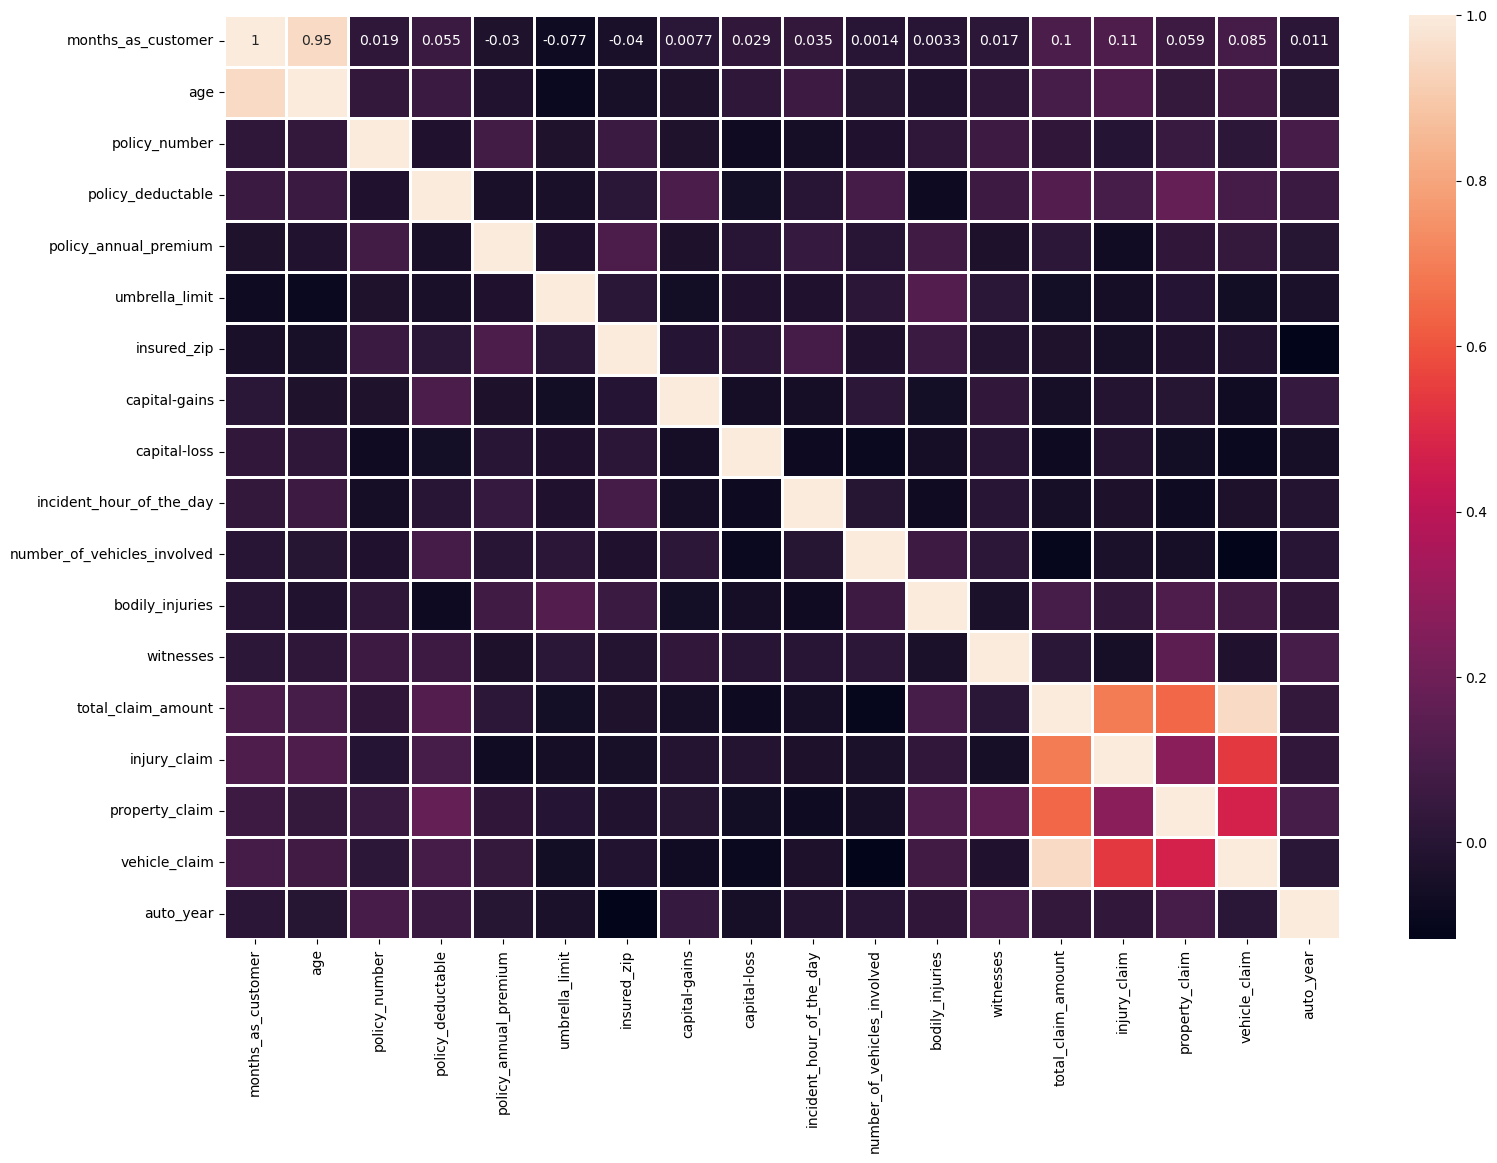

In [10]:
# Plot Correlation Matrix with Heatmap function

plt.figure(figsize = (18, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [11]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df = df.drop(to_drop, axis = 1)

In [12]:
df

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
5,256,39,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,...,3,NO,0,2,NO,64100,6410,6410,51280,Y
8,27,33,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,...,1,NO,1,1,YES,27700,2770,2770,22160,N
11,447,61,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,other-relative,...,3,YES,1,2,YES,114920,17680,17680,79560,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,500/1000,1000,1361.45,0,MALE,PhD,handlers-cleaners,unmarried,...,1,YES,0,2,YES,82170,7470,7470,67230,N
984,163,36,250/500,1000,1503.21,0,MALE,MD,other-service,husband,...,1,YES,2,1,NO,51390,5710,11420,34260,N
988,295,46,100/300,500,1672.88,0,FEMALE,High School,armed-forces,wife,...,1,YES,1,1,NO,60700,12140,6070,42490,N
991,257,44,100/300,1000,1280.88,0,MALE,MD,other-service,other-relative,...,1,NO,0,1,NO,46980,0,5220,41760,N


In [13]:
# spliting the data into X(Input) and y(Output)

X = df.iloc[:,:-1]
X

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,5,1,YES,1,2,YES,71610,6510,13020,52080
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,7,3,NO,2,3,NO,34650,7700,3850,23100
5,256,39,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,...,19,3,NO,0,2,NO,64100,6410,6410,51280
8,27,33,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,...,21,1,NO,1,1,YES,27700,2770,2770,22160
11,447,61,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,other-relative,...,21,3,YES,1,2,YES,114920,17680,17680,79560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,500/1000,1000,1361.45,0,MALE,PhD,handlers-cleaners,unmarried,...,12,1,YES,0,2,YES,82170,7470,7470,67230
984,163,36,250/500,1000,1503.21,0,MALE,MD,other-service,husband,...,1,1,YES,2,1,NO,51390,5710,11420,34260
988,295,46,100/300,500,1672.88,0,FEMALE,High School,armed-forces,wife,...,5,1,YES,1,1,NO,60700,12140,6070,42490
991,257,44,100/300,1000,1280.88,0,MALE,MD,other-service,other-relative,...,21,1,NO,0,1,NO,46980,0,5220,41760


In [14]:
# Get the y 
y = df.iloc[:,-1]
y

0      Y
2      N
5      Y
8      N
11     N
      ..
980    N
984    N
988    N
991    N
992    N
Name: fraud_reported, Length: 340, dtype: object

## Encoding the data

In [15]:
# printing unique values of each column

for col in X.select_dtypes(include = ['object']).columns:
    print(f"{col}: \n{X[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'High School' 'College' 'Masters' 'JD' 'Associate']

insured_occupation: 
['craft-repair' 'sales' 'tech-support' 'other-service' 'exec-managerial'
 'protective-serv' 'machine-op-inspct' 'transport-moving' 'prof-specialty'
 'adm-clerical' 'handlers-cleaners' 'armed-forces' 'farming-fishing'
 'priv-house-serv']

insured_relationship: 
['husband' 'own-child' 'unmarried' 'other-relative' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Multi-vehicle Collision']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss']

authorities_contacted: 
['Police' 'Fire' 'Ambulance' 'Other']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [16]:
#storing the dummies in X_temp for string type to splits into columns

X_temp = pd.get_dummies(X.select_dtypes(include = ['object']), drop_first = True, dtype = float)

In [17]:
#Drop the Index column after dummies to get real counts of records

X_temp = X_temp.reset_index(drop = True)
X_temp

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_type_Single Vehicle Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
336,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
338,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Normalisation

In [18]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
#Normalisation of int/num types of data

sd = X.select_dtypes(include = ['int64'])
scaled_data = scaler.fit_transform(sd)
X_int64 = pd.DataFrame(data = scaled_data, columns = sd.columns)
X_int64

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.033411,0.924229,-0.264573,-0.448865,0.961916,0.953405,-1.221874,-0.945345,-0.021747,0.485937,0.535081,-0.574301,1.063132,0.599600
1,-0.689289,-1.119770,1.370969,1.935729,0.314775,0.953405,-0.923749,0.956532,1.210558,1.393731,-1.727232,-0.286692,-1.230652,-1.930520
2,0.394058,-0.043981,-0.264573,-0.448865,-0.933282,0.953405,0.865001,0.956532,-1.254051,0.485937,0.075396,-0.598470,-0.590294,0.529756
3,-1.639438,-0.689454,-1.082344,-0.448865,-0.933282,0.953405,1.163125,-0.945345,-0.021747,-0.421857,-2.152640,-1.478215,-1.500804,-2.012587
4,2.090118,2.322755,1.370969,-0.448865,-0.933282,-0.849907,1.163125,0.956532,-0.021747,0.485937,3.186077,2.125356,2.228785,2.998762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.296380,0.063598,-0.264573,-0.448865,0.464116,0.953405,-0.178437,-0.945345,-1.254051,0.485937,1.181457,-0.342280,-0.325145,1.922282
336,-0.431772,-0.366717,-0.264573,-0.448865,1.047254,-0.811012,-1.818123,-0.945345,1.210558,-0.421857,-0.702580,-0.767652,0.662908,-0.956188
337,0.740374,0.709071,-1.082344,-0.448865,-0.933282,0.953405,-1.221874,-0.945345,-0.021747,-0.421857,-0.132717,0.786404,-0.675341,-0.237662
338,0.402938,0.493914,-0.264573,-0.448865,1.178815,-0.185157,1.163125,-0.945345,-1.254051,-0.421857,-0.972515,-2.147691,-0.887960,-0.301395


In [20]:
#Nnormalisation of Float type of data

sd = X.select_dtypes(include = ['float64'])
scaled_data = scaler.fit_transform(sd)
X_float64 = pd.DataFrame(data = scaled_data, columns = sd.columns)
X_float64

,policy_annual_premium
0,0.555609
1,0.581074
2,0.327485
3,0.703086
4,-0.546997
...,...
335,0.369791
336,0.949236
337,1.642764
338,0.040460


In [21]:
 #Concating the X-temp of unique objests with num and float

X = pd.concat([X_temp,X_int64,X_float64], axis = 1)
X

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_annual_premium
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.953405,-1.221874,-0.945345,-0.021747,0.485937,0.535081,-0.574301,1.063132,0.599600,0.555609
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.953405,-0.923749,0.956532,1.210558,1.393731,-1.727232,-0.286692,-1.230652,-1.930520,0.581074
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.953405,0.865001,0.956532,-1.254051,0.485937,0.075396,-0.598470,-0.590294,0.529756,0.327485
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.953405,1.163125,-0.945345,-0.021747,-0.421857,-2.152640,-1.478215,-1.500804,-2.012587,0.703086
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.849907,1.163125,0.956532,-0.021747,0.485937,3.186077,2.125356,2.228785,2.998762,-0.546997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.953405,-0.178437,-0.945345,-1.254051,0.485937,1.181457,-0.342280,-0.325145,1.922282,0.369791
336,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.811012,-1.818123,-0.945345,1.210558,-0.421857,-0.702580,-0.767652,0.662908,-0.956188,0.949236
337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.953405,-1.221874,-0.945345,-0.021747,-0.421857,-0.132717,0.786404,-0.675341,-0.237662,1.642764
338,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.185157,1.163125,-0.945345,-1.254051,-0.421857,-0.972515,-2.147691,-0.887960,-0.301395,0.040460


## Train and Test Splitting

In [22]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Training SVC 

In [23]:
#Import the Support Vector Classifier from Scikit-Learn's Support Vector Machine

from sklearn.svm import SVC

In [24]:
#Creating an Object called svc of Classifier

svc = SVC()

In [25]:
#Training the model using fit function on trained datas

svc.fit(X_train, y_train)

SVC()

In [27]:
#Predicting the Froud from a model by passing test data

y_pred = svc.predict(X_test)
y_pred

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [28]:
y_test

130    N
47     Y
471    N
228    N
717    N
      ..
814    N
466    N
71     Y
66     Y
752    N
Name: fraud_reported, Length: 85, dtype: object

In [29]:
# Import accuracy_score, confusion_matrix and classification_report from Scikit-Learn

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
#Calculation of Trained and Test Accuracy

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

In [31]:
#Printing Accuracy 

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

Training accuracy of Support Vector Classifier is : 0.8352941176470589
Test accuracy of Support Vector Classifier is : 0.7647058823529411


In [32]:
# Printring Confusion matrix of Actual Vs Prediction

print(confusion_matrix(y_test, y_pred))

[[65  1]
 [19  0]]


In [33]:
#Printing precision, Recall, F1-Score and Support

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.77      0.98      0.87        66
           Y       0.00      0.00      0.00        19

    accuracy                           0.76        85
   macro avg       0.39      0.49      0.43        85
weighted avg       0.60      0.76      0.67        85

